# Image filters

In [21]:
import seaborn_image as isns

isns.set_context("notebook")
isns.set_image(cmap="inferno") # set default colormap to inferno

In [22]:
pol = isns.load_image("polymer")

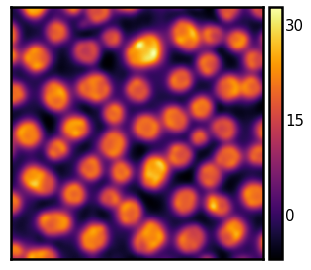

In [23]:
ax = isns.filterplot(pol, filt="gaussian", sigma=2.5)

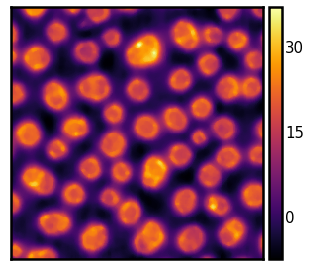

In [24]:
ax = isns.filterplot(pol, filt="median", size=5)

In [25]:
isns.implemented_filters.keys()

dict_keys(['sobel', 'gaussian', 'median', 'max', 'diff_of_gaussians', 'gaussian_gradient_magnitude', 'gaussian_laplace', 'laplace', 'min', 'percentile', 'prewitt', 'rank', 'uniform'])

## User-defined filters or any callable filter function

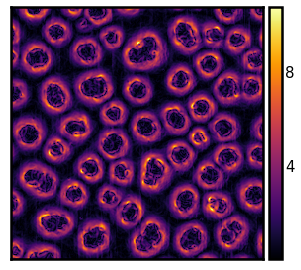

In [26]:
from skimage.filters import scharr

ax = isns.filterplot(pol, filt=scharr)

## Fast-Fourier Transform

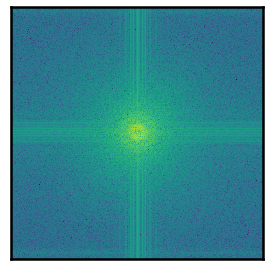

In [27]:
ax = isns.fftplot(pol)

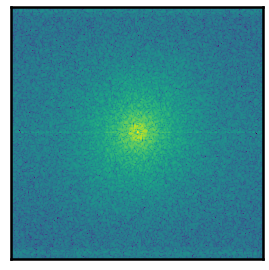

In [28]:
ax = isns.fftplot(pol, window_type="hann")

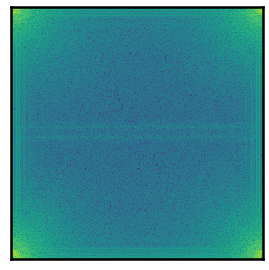

In [29]:
ax = isns.fftplot(pol, shift=False)

## ParamGrid

> Explore relationships between different parameters of an input function.

Using `ParamGrid`, we can map a function to the image and explore the interplay betweem different parameters of the function.

In the example below, we are using the `median` filter function on the input image `pol` and exploring how the `pol` image would look with different median filter `size`. The `col` parameter is set to `"size"` which means that the different `size` filters will be plotted along the column of the grid.

> The function to be mapped can be any **_callable function_** that takes image data as its first input or one of the **_implemented image filters_** in seaborn-image (`isns.implemented_filters()`)

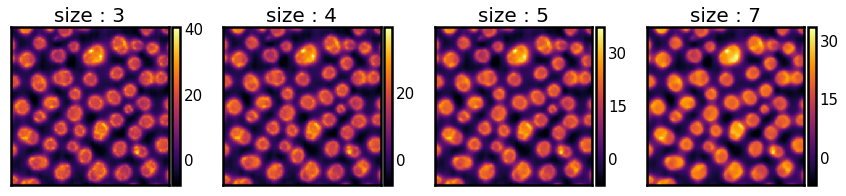

In [34]:
from skimage.filters import median

g = isns.ParamGrid(pol, median, col="size", size=[3,4,5,7])

We can also specify the `col_wrap` parameter to only have a grid of the specified size.

> Below, `'median'` passed as a string is looking through `seaborn_image.implemented_filters()` for the corresponding function.
> As a side note, these `implemented_filters` exist primarily for convenience and are generally the common filters one would use for typical image analysis.

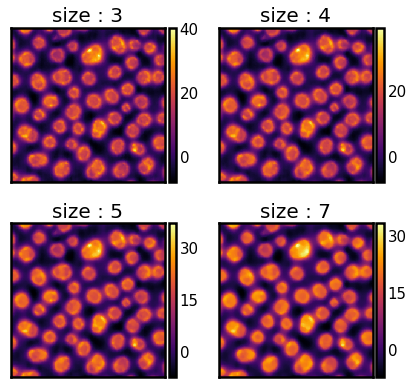

In [35]:
g = isns.ParamGrid(pol, "median", col="size", size=[3,4,5,7], col_wrap=2)

We can specify different parameters across the `row` and `col` of the grid. 

In the example below, we are plotting different `percentile` parameters across `row` and different `size` parameters across `col` for a `percentile` function applied to the input `pol` image.

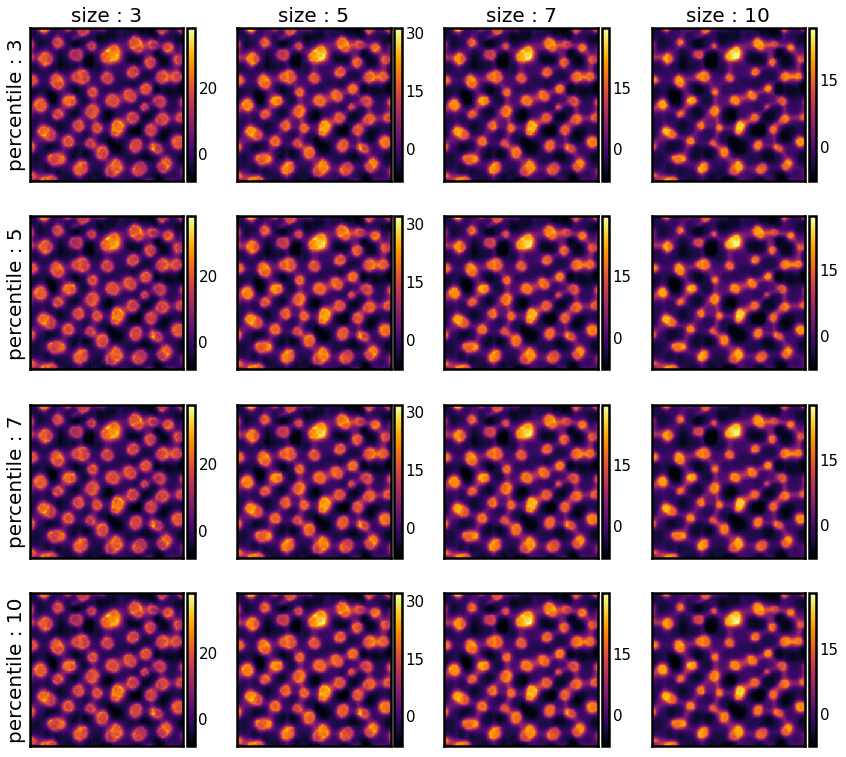

In [39]:
g = isns.ParamGrid(pol,
                    "percentile",
                    row="percentile",
                    col="size",
                    percentile=[3, 5, 7, 10],
                    size=[3, 5, 7, 10]
                   )

We can also specify additional parameters that need to be passed to the input function. Here, `mode=reflect` is the additional parameter passed to the `median` filter function and is constant across all the different `size` parameters.

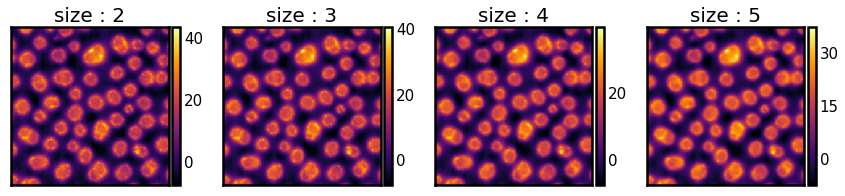

In [41]:
g = isns.ParamGrid(pol, "median", col="size", size=[2,3,4,5], mode="reflect")

We can also specify additional parameters for `ParamGrid`. Here, we are additionally specifying the parameters relevant for adding a scale bar (`dx` and `units`)

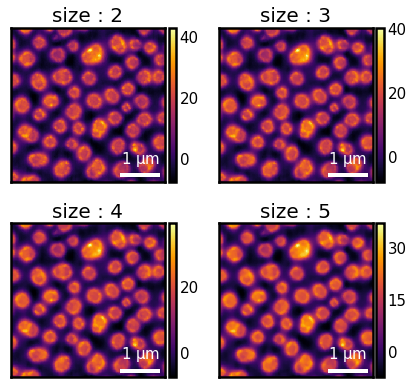

In [43]:
scale = {"dx" : 15, "units" : "nm"}

g = isns.ParamGrid(pol,
                    median,
                    col="size",
                    size=[2,3,4,5],
                    mode="reflect",
                    col_wrap=2,
                    **scale
                   )